In [2]:
import numpy as np
import pandas as pd

## Data Preprocessing

In [3]:
asteroid_dataset = pd.read_csv('dataset.csv')

C:\Users\majet\AppData\Local\Temp\ipykernel_25168\249795912.py:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  asteroid_dataset = pd.read_csv('dataset.csv')


In [4]:
df = asteroid_dataset.copy()

In [5]:
df.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [6]:
df.shape

(958524, 45)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

In [8]:
## Dropping Name Columns

df.drop(['name','equinox','pdes','id','prefix','spkid','full_name'],axis=1,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   neo             958520 non-null  object 
 1   pha             938603 non-null  object 
 2   H               952261 non-null  float64
 3   diameter        136209 non-null  float64
 4   albedo          135103 non-null  float64
 5   diameter_sigma  136081 non-null  float64
 6   orbit_id        958524 non-null  object 
 7   epoch           958524 non-null  float64
 8   epoch_mjd       958524 non-null  int64  
 9   epoch_cal       958524 non-null  float64
 10  e               958524 non-null  float64
 11  a               958524 non-null  float64
 12  q               958524 non-null  float64
 13  i               958524 non-null  float64
 14  om              958524 non-null  float64
 15  w               958524 non-null  float64
 16  ma              958523 non-null  float64
 17  ad        

In [10]:
Hazardous = df[df.pha=='Y']
Non_Hazardous = df[df.pha=='N']

percentage_Hazardous = len(Hazardous)/(len(Hazardous) + len(Non_Hazardous))
percentage_Non_Hazardous = len(Non_Hazardous)/(len(Hazardous) + len(Non_Hazardous))

print("Hazardous Count:", len(Hazardous))
print("Non-Hazardous Count:", len(Non_Hazardous))
print("% of Hazardous Asteroids:", percentage_Hazardous * 100, "%")
print("% of Non-Hazardous Asteroids:", percentage_Non_Hazardous * 100, "%")

Hazardous Count: 2066
Non-Hazardous Count: 936537
% of Hazardous Asteroids: 0.2201143614499421 %
% of Non-Hazardous Asteroids: 99.77988563855006 %


In [11]:
null_percentages = df.isnull().mean()

In [12]:
print(null_percentages)

neo               0.000004
pha               0.020783
H                 0.006534
diameter          0.857897
albedo            0.859051
diameter_sigma    0.858031
orbit_id          0.000000
epoch             0.000000
epoch_mjd         0.000000
epoch_cal         0.000000
e                 0.000000
a                 0.000000
q                 0.000000
i                 0.000000
om                0.000000
w                 0.000000
ma                0.000001
ad                0.000004
n                 0.000000
tp                0.000000
tp_cal            0.000000
per               0.000004
per_y             0.000001
moid              0.020783
moid_ld           0.000132
sigma_e           0.020784
sigma_a           0.020784
sigma_q           0.020784
sigma_i           0.020784
sigma_om          0.020784
sigma_w           0.020784
sigma_ma          0.020784
sigma_ad          0.020788
sigma_n           0.020784
sigma_tp          0.020784
sigma_per         0.020788
class             0.000000
r

In [13]:
null_cutoff = 0.4

columns_to_drop = null_percentages[null_percentages > null_cutoff].index

columns_to_drop

Index(['diameter', 'albedo', 'diameter_sigma'], dtype='object')

In [14]:
# Drop columns with null percentages greater than null_cutoff 

df.drop(columns=columns_to_drop, axis = 1, inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 35 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   neo        958520 non-null  object 
 1   pha        938603 non-null  object 
 2   H          952261 non-null  float64
 3   orbit_id   958524 non-null  object 
 4   epoch      958524 non-null  float64
 5   epoch_mjd  958524 non-null  int64  
 6   epoch_cal  958524 non-null  float64
 7   e          958524 non-null  float64
 8   a          958524 non-null  float64
 9   q          958524 non-null  float64
 10  i          958524 non-null  float64
 11  om         958524 non-null  float64
 12  w          958524 non-null  float64
 13  ma         958523 non-null  float64
 14  ad         958520 non-null  float64
 15  n          958524 non-null  float64
 16  tp         958524 non-null  float64
 17  tp_cal     958524 non-null  float64
 18  per        958520 non-null  float64
 19  per_y      958523 non-n

In [16]:
# Dropping duplicate rows
df.drop_duplicates(inplace=True)

In [17]:
df.shape

(958524, 35)

In [18]:
df.dropna(subset=['pha'], inplace=True)

In [19]:
df.shape

(938603, 35)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 938603 entries, 0 to 958523
Data columns (total 35 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   neo        938599 non-null  object 
 1   pha        938603 non-null  object 
 2   H          932341 non-null  float64
 3   orbit_id   938603 non-null  object 
 4   epoch      938603 non-null  float64
 5   epoch_mjd  938603 non-null  int64  
 6   epoch_cal  938603 non-null  float64
 7   e          938603 non-null  float64
 8   a          938603 non-null  float64
 9   q          938603 non-null  float64
 10  i          938603 non-null  float64
 11  om         938603 non-null  float64
 12  w          938603 non-null  float64
 13  ma         938602 non-null  float64
 14  ad         938599 non-null  float64
 15  n          938603 non-null  float64
 16  tp         938603 non-null  float64
 17  tp_cal     938603 non-null  float64
 18  per        938599 non-null  float64
 19  per_y      938602 non-n

In [21]:
# Get categorical features
categorical_features = df.select_dtypes(include=['object'])

# Get numerical features
numerical_features = df.select_dtypes(exclude=['object'])

In [22]:
print(categorical_features)

       neo pha orbit_id class
0        N   N   JPL 47   MBA
1        N   N   JPL 37   MBA
2        N   N  JPL 112   MBA
3        N   N   JPL 35   MBA
4        N   N  JPL 114   MBA
...     ..  ..      ...   ...
958519   N   N    JPL 5   MBA
958520   N   N        8   MBA
958521   Y   Y       17   APO
958522   N   N    JPL 3   MBA
958523   N   N    JPL 3   MBA

[938603 rows x 4 columns]


In [23]:
categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 938603 entries, 0 to 958523
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   neo       938599 non-null  object
 1   pha       938603 non-null  object
 2   orbit_id  938603 non-null  object
 3   class     938603 non-null  object
dtypes: object(4)
memory usage: 35.8+ MB


In [24]:
# Fill missing values with mode for the selected categorical features
df[categorical_features.columns] = df[categorical_features.columns].apply(lambda x: x.fillna(x.mode()[0]))

In [25]:
categorical_features = df.select_dtypes(include=['object'])

categorical_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 938603 entries, 0 to 958523
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   neo       938603 non-null  object
 1   pha       938603 non-null  object
 2   orbit_id  938603 non-null  object
 3   class     938603 non-null  object
dtypes: object(4)
memory usage: 35.8+ MB


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 938603 entries, 0 to 958523
Data columns (total 35 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   neo        938603 non-null  object 
 1   pha        938603 non-null  object 
 2   H          932341 non-null  float64
 3   orbit_id   938603 non-null  object 
 4   epoch      938603 non-null  float64
 5   epoch_mjd  938603 non-null  int64  
 6   epoch_cal  938603 non-null  float64
 7   e          938603 non-null  float64
 8   a          938603 non-null  float64
 9   q          938603 non-null  float64
 10  i          938603 non-null  float64
 11  om         938603 non-null  float64
 12  w          938603 non-null  float64
 13  ma         938602 non-null  float64
 14  ad         938599 non-null  float64
 15  n          938603 non-null  float64
 16  tp         938603 non-null  float64
 17  tp_cal     938603 non-null  float64
 18  per        938599 non-null  float64
 19  per_y      938602 non-n

In [27]:
df.shape

(938603, 35)

In [28]:
numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 938603 entries, 0 to 958523
Data columns (total 31 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   H          932341 non-null  float64
 1   epoch      938603 non-null  float64
 2   epoch_mjd  938603 non-null  int64  
 3   epoch_cal  938603 non-null  float64
 4   e          938603 non-null  float64
 5   a          938603 non-null  float64
 6   q          938603 non-null  float64
 7   i          938603 non-null  float64
 8   om         938603 non-null  float64
 9   w          938603 non-null  float64
 10  ma         938602 non-null  float64
 11  ad         938599 non-null  float64
 12  n          938603 non-null  float64
 13  tp         938603 non-null  float64
 14  tp_cal     938603 non-null  float64
 15  per        938599 non-null  float64
 16  per_y      938602 non-null  float64
 17  moid       938603 non-null  float64
 18  moid_ld    938603 non-null  float64
 19  sigma_e    938602 non-n

In [29]:
# Fill missing values with mean for numerical features
df[numerical_features.columns] = df[numerical_features.columns].apply(lambda x: x.fillna(x.mean()))

In [30]:
numerical_features = df.select_dtypes(exclude=['object'])

numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 938603 entries, 0 to 958523
Data columns (total 31 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   H          938603 non-null  float64
 1   epoch      938603 non-null  float64
 2   epoch_mjd  938603 non-null  int64  
 3   epoch_cal  938603 non-null  float64
 4   e          938603 non-null  float64
 5   a          938603 non-null  float64
 6   q          938603 non-null  float64
 7   i          938603 non-null  float64
 8   om         938603 non-null  float64
 9   w          938603 non-null  float64
 10  ma         938603 non-null  float64
 11  ad         938603 non-null  float64
 12  n          938603 non-null  float64
 13  tp         938603 non-null  float64
 14  tp_cal     938603 non-null  float64
 15  per        938603 non-null  float64
 16  per_y      938603 non-null  float64
 17  moid       938603 non-null  float64
 18  moid_ld    938603 non-null  float64
 19  sigma_e    938603 non-n

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 938603 entries, 0 to 958523
Data columns (total 35 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   neo        938603 non-null  object 
 1   pha        938603 non-null  object 
 2   H          938603 non-null  float64
 3   orbit_id   938603 non-null  object 
 4   epoch      938603 non-null  float64
 5   epoch_mjd  938603 non-null  int64  
 6   epoch_cal  938603 non-null  float64
 7   e          938603 non-null  float64
 8   a          938603 non-null  float64
 9   q          938603 non-null  float64
 10  i          938603 non-null  float64
 11  om         938603 non-null  float64
 12  w          938603 non-null  float64
 13  ma         938603 non-null  float64
 14  ad         938603 non-null  float64
 15  n          938603 non-null  float64
 16  tp         938603 non-null  float64
 17  tp_cal     938603 non-null  float64
 18  per        938603 non-null  float64
 19  per_y      938603 non-n

## Standardizing the Data

In [32]:
target_column = 'pha'

# Create features (X) by excluding the target variable
X = df.drop(columns=[target_column])

# Create the target variable (t)
t = df[target_column]

In [33]:
column_name = 'orbit_id'

print(X[column_name].value_counts())
print(len(X[column_name].value_counts()))

1          50142
JPL 1      47494
JPL 2      34568
JPL 3      29931
12         29136
           ...  
JPL 348        1
559            1
223            1
JPL 303        1
260            1
Name: orbit_id, Length: 526, dtype: int64
526


In [34]:
X.head()

,neo,H,orbit_id,epoch,epoch_mjd,epoch_cal,e,a,q,i,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,N,3.40,JPL 47,2458600.5,58600,20190427.0,0.076009,2.769165,2.558684,10.594067,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,N,4.20,JPL 37,2459000.5,59000,20200531.0,0.229972,2.773841,2.135935,34.832932,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,N,5.33,JPL 112,2459000.5,59000,20200531.0,0.256936,2.668285,1.982706,12.991043,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,N,3.00,JPL 35,2458600.5,58600,20190427.0,0.088721,2.361418,2.151909,7.141771,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,N,6.90,JPL 114,2459000.5,59000,20200531.0,0.190913,2.574037,2.082619,5.367427,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [35]:
X.shape

(938603, 34)

In [36]:
unique_classes_counts = {feature: X[feature].nunique() for feature in X.select_dtypes(include=['object']).columns}
print(unique_classes_counts)

{'neo': 2, 'orbit_id': 526, 'class': 13}


In [37]:
# Assuming 'df' is your DataFrame and 'your_column' is the column of interest
column_name = 'orbit_id'

# Step 1: Check the count of each class in the column
class_counts = X[column_name].value_counts()

# Step 2: Identify classes with counts less than 100
classes_to_replace = class_counts[class_counts < 100].index

# Step 3: Replace classes with counts less than 100 with 'Other'
X[column_name] = X[column_name].apply(lambda x: 'Other' if x in classes_to_replace else x)

# Step 4: Verify the changes
print(X[column_name].value_counts())
print(len(X[column_name].value_counts()))

1        50142
JPL 1    47494
JPL 2    34568
JPL 3    29931
12       29136
         ...  
37         141
39         115
38         103
41         102
40         100
Name: orbit_id, Length: 83, dtype: int64
83


In [38]:
X.columns

Index(['neo', 'H', 'orbit_id', 'epoch', 'epoch_mjd', 'epoch_cal', 'e', 'a',
       'q', 'i', 'om', 'w', 'ma', 'ad', 'n', 'tp', 'tp_cal', 'per', 'per_y',
       'moid', 'moid_ld', 'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i',
       'sigma_om', 'sigma_w', 'sigma_ma', 'sigma_ad', 'sigma_n', 'sigma_tp',
       'sigma_per', 'class', 'rms'],
      dtype='object')

In [39]:
numerical_features

,H,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
0,3.400,2458600.5,58600,20190427.0,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,...,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.43301
1,4.200,2459000.5,59000,20200531.0,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,...,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,0.35936
2,5.330,2459000.5,59000,20200531.0,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,...,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,0.33848
3,3.000,2458600.5,58600,20190427.0,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,...,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,0.39980
4,6.900,2459000.5,59000,20200531.0,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,...,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958519,17.135,2437203.5,37203,19600926.0,0.185919,2.280861,1.856807,5.984416,194.229902,195.442802,...,7.299800e-01,6.969000e+00,7.433000e+00,4.631100e+01,2.738300e+01,1.041200e+00,1.652100e-01,1.309700e+02,7.264900e+02,0.23839
958520,18.500,2459000.5,59000,20200531.0,0.282920,2.334910,1.674319,8.082280,355.248239,5.216223,...,6.256300e-07,1.563500e-05,5.598600e-05,2.380400e-04,1.298200e-04,2.418900e-08,3.346100e-09,4.690200e-04,1.578500e-05,0.53633
958521,20.400,2459000.5,59000,20200531.0,0.662446,2.817152,0.950941,4.679278,182.982832,234.894852,...,1.687100e-07,1.853300e-05,5.691700e-05,8.969200e-05,5.272600e-05,1.650100e-07,1.101600e-08,2.830600e-04,9.127500e-05,0.51556
958522,18.071,2441956.5,41956,19731001.0,0.202053,2.373137,1.893638,0.732484,176.499082,198.026527,...,5.478400e-01,5.448800e-01,4.391600e+00,1.898800e+01,1.083800e+01,7.171600e-01,1.016700e-01,3.898400e+01,5.035500e+02,0.25641


In [40]:
numerical_features = numerical_features.columns

In [41]:
data_corr = pd.DataFrame(X[numerical_features].corr()>=0.95)

In [42]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

data_corr

,H,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
H,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
epoch,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
epoch_mjd,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
epoch_cal,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
e,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
a,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
q,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
i,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
om,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
w,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [43]:
true_counts_per_column = data_corr.sum()
print("Number of True values in each column:")
print(true_counts_per_column)

Number of True values in each column:
H            1
epoch        3
epoch_mjd    3
epoch_cal    3
e            1
a            1
q            3
i            1
om           1
w            1
ma           1
ad           3
n            1
tp           2
tp_cal       2
per          3
per_y        3
moid         3
moid_ld      3
sigma_e      1
sigma_a      2
sigma_q      1
sigma_i      1
sigma_om     1
sigma_w      3
sigma_ma     3
sigma_ad     2
sigma_n      1
sigma_tp     3
sigma_per    1
rms          1
dtype: int64


In [44]:
# Removed epoch_mjd because there is high collineariy betwee epoch, epoch_mjd, and epoch_cal
# Removed epoch_cal because there is high collinearity between epoch, epoch_mjd, and epoch_cal
# Removed ad because ad = a * (1 + e) => Researched a bit
# Removed tp_cal because tp and tp_cal are highly co-related
# Removed per_y because per and per_y are highly co-related
# Removed moid and moid_ld becauce these both are highly co-related with q need q for ad
# Removed sigma_ma and sigma_tp because they both are highly correlated with sigma_w
# Removed sigma_ad because we are not using ad

cols_to_drop = ['epoch_mjd', 'epoch_cal', 'ad', 'tp_cal', 'per_y', 'moid', 'moid_ld', 'sigma_ma', 'sigma_ad', 'sigma_tp']

X.drop(cols_to_drop, axis=1, inplace=True)

In [45]:
numerical_features = [feature for feature in numerical_features if feature not in cols_to_drop]

In [46]:
data_corr = pd.DataFrame(X[numerical_features].corr()>=0.95)

In [47]:
data_corr

,H,epoch,e,a,q,i,om,w,ma,n,tp,per,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_n,sigma_per,rms
H,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
epoch,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
e,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
a,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
q,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
i,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
om,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
w,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
ma,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
n,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [48]:
true_counts_per_column = data_corr.sum()
print("Number of True values in each column:")
print(true_counts_per_column)

Number of True values in each column:
H            1
epoch        1
e            1
a            1
q            1
i            1
om           1
w            1
ma           1
n            1
tp           1
per          1
sigma_e      1
sigma_a      1
sigma_q      1
sigma_i      1
sigma_om     1
sigma_w      1
sigma_n      1
sigma_per    1
rms          1
dtype: int64


In [49]:
## INPUT CSV NEED TO HAVE THIS AND FOR orbit id there are only 83 classes now and for class there are 13 classes

unique_classes_counts = {feature: X[feature].nunique() for feature in X.select_dtypes(include=['object']).columns}
print(unique_classes_counts)

feature_name = 'orbit_id'
unique_orbit_id_classes = X[feature_name].unique()

print("Orbit-ID Unique Classes:", unique_orbit_id_classes)

feature_name = 'class'
unique_orbit_id_classes = X[feature_name].unique()

print("Class Unique Classes:", unique_orbit_id_classes)

X.info()

{'neo': 2, 'orbit_id': 83, 'class': 13}
Orbit-ID Unique Classes: ['Other' 'JPL 37' 'JPL 35' 'JPL 40' 'JPL 36' 'JPL 41' 'JPL 39' 'JPL 38'
 '36' 'JPL 31' 'JPL 34' 'JPL 32' 'JPL 33' 'JPL 26' 'JPL 29' 'JPL 27'
 'JPL 28' '39' 'JPL 30' '38' '27' 'JPL 25' '32' '34' '30' 'JPL 24' '37'
 'JPL 19' '28' 'JPL 21' '25' '31' '33' '35' '26' '11' '15' '22' 'JPL 23'
 '20' 'JPL 22' 'JPL 13' '29' '24' '19' 'JPL 20' 'JPL 15' '12' '23'
 'JPL 17' '16' '18' '21' 'JPL 18' '3' 'JPL 16' 'JPL 14' '14' '8' '13' '17'
 'JPL 11' '4' 'JPL 12' 'JPL 9' '7' 'JPL 6' '9' 'JPL 5' '10' '6' 'JPL 10'
 'JPL 4' '41' 'JPL 7' '5' '40' 'JPL 8' '2' 'JPL 3' '1' 'JPL 2' 'JPL 1']
Class Unique Classes: ['MBA' 'OMB' 'MCA' 'AMO' 'IMB' 'TJN' 'CEN' 'APO' 'ATE' 'AST' 'TNO' 'IEO'
 'HYA']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 938603 entries, 0 to 958523
Data columns (total 24 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   neo        938603 non-null  object 
 1   H          938603 no

In [50]:
X.shape

(938603, 24)

In [51]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import joblib

pd.set_option('display.max_columns', None)

categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

ohe=OneHotEncoder(sparse=False)
le=LabelEncoder()

# Apply label-encoding for binary features
X_label_encoded = X.apply(lambda col: le.fit_transform(col) if col.nunique() == 2 else col, axis=0)

categorical_features_to_encode = [col for col in categorical_features if X[col].nunique() > 2]

X_encoded = pd.get_dummies(X_label_encoded, columns=categorical_features_to_encode, drop_first=True, sparse=False)
print(X_encoded.shape)

# Apply label-encoding for target
t_encoded = le.fit_transform(t)

# Save the model to a file
joblib.dump(le, 'label_encoder.joblib')

(938603, 116)


['label_encoder.joblib']

In [52]:
X_encoded.head()

,neo,H,epoch,e,a,q,i,om,w,ma,n,tp,per,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_n,sigma_per,rms,orbit_id_10,orbit_id_11,orbit_id_12,orbit_id_13,orbit_id_14,orbit_id_15,orbit_id_16,orbit_id_17,orbit_id_18,orbit_id_19,orbit_id_2,orbit_id_20,orbit_id_21,orbit_id_22,orbit_id_23,orbit_id_24,orbit_id_25,orbit_id_26,orbit_id_27,orbit_id_28,orbit_id_29,orbit_id_3,orbit_id_30,orbit_id_31,orbit_id_32,orbit_id_33,orbit_id_34,orbit_id_35,orbit_id_36,orbit_id_37,orbit_id_38,orbit_id_39,orbit_id_4,orbit_id_40,orbit_id_41,orbit_id_5,orbit_id_6,orbit_id_7,orbit_id_8,orbit_id_9,orbit_id_JPL 1,orbit_id_JPL 10,orbit_id_JPL 11,orbit_id_JPL 12,orbit_id_JPL 13,orbit_id_JPL 14,orbit_id_JPL 15,orbit_id_JPL 16,orbit_id_JPL 17,orbit_id_JPL 18,orbit_id_JPL 19,orbit_id_JPL 2,orbit_id_JPL 20,orbit_id_JPL 21,orbit_id_JPL 22,orbit_id_JPL 23,orbit_id_JPL 24,orbit_id_JPL 25,orbit_id_JPL 26,orbit_id_JPL 27,orbit_id_JPL 28,orbit_id_JPL 29,orbit_id_JPL 3,orbit_id_JPL 30,orbit_id_JPL 31,orbit_id_JPL 32,orbit_id_JPL 33,orbit_id_JPL 34,orbit_id_JPL 35,orbit_id_JPL 36,orbit_id_JPL 37,orbit_id_JPL 38,orbit_id_JPL 39,orbit_id_JPL 4,orbit_id_JPL 40,orbit_id_JPL 41,orbit_id_JPL 5,orbit_id_JPL 6,orbit_id_JPL 7,orbit_id_JPL 8,orbit_id_JPL 9,orbit_id_Other,class_APO,class_AST,class_ATE,class_CEN,class_HYA,class_IEO,class_IMB,class_MBA,class_MCA,class_OMB,class_TJN,class_TNO
0,0,3.40,2458600.5,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,0.213885,2.458239e+06,1683.145703,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,1.196500e-12,9.415900e-09,0.43301,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0,4.20,2459000.5,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,0.213345,2.458321e+06,1687.410992,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,4.653600e-10,3.680700e-06,0.35936,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,5.33,2459000.5,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,0.226129,2.458446e+06,1592.013769,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,4.413400e-10,3.107200e-06,0.33848,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
3,0,3.00,2458600.5,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,0.271609,2.458248e+06,1325.432763,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,2.612500e-10,1.274900e-06,0.39980,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,6.90,2459000.5,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,0.238661,2.458926e+06,1508.414421,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,5.522700e-10,3.490500e-06,0.52191,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [53]:
X_encoded.shape

(938603, 116)

In [54]:
X_label_encoded.tail()

,neo,H,orbit_id,epoch,e,a,q,i,om,w,ma,n,tp,per,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_n,sigma_per,class,rms
958519,0,17.135,JPL 5,2437203.5,0.185919,2.280861,1.856807,5.984416,194.229902,195.442802,342.057565,0.286125,2.437266e+06,1258.191614,2.142200e-02,8.779900e-01,7.299800e-01,6.969000,7.433000,46.311000,1.652100e-01,726.490000,MBA,0.23839
958520,0,18.500,8,2459000.5,0.282920,2.334910,1.674319,8.082280,355.248239,5.216223,260.113042,0.276248,2.459362e+06,1303.177916,2.642000e-07,1.885500e-08,6.256300e-07,0.000016,0.000056,0.000238,3.346100e-09,0.000016,MBA,0.53633
958521,1,20.400,17,2459000.5,0.662446,2.817152,0.950941,4.679278,182.982832,234.894852,240.473601,0.208444,2.459574e+06,1727.085364,6.636800e-08,9.925600e-08,1.687100e-07,0.000019,0.000057,0.000090,1.101600e-08,0.000091,APO,0.51556
958522,0,18.071,JPL 3,2441956.5,0.202053,2.373137,1.893638,0.732484,176.499082,198.026527,355.351127,0.269600,2.441974e+06,1335.311579,3.169800e-02,5.966200e-01,5.478400e-01,0.544880,4.391600,18.988000,1.016700e-01,503.550000,MBA,0.25641
958523,0,18.060,JPL 3,2443429.5,0.258348,2.260404,1.676433,9.661947,204.512448,148.496988,15.320134,0.290018,2.443377e+06,1241.302609,1.486800e-02,1.292700e-01,6.252600e-02,1.102300,0.311700,1.284300,2.487900e-02,106.480000,MBA,0.26980


In [55]:
from sklearn.model_selection import train_test_split

X_train, X_temp, t_train, t_temp = train_test_split(X_encoded, t_encoded, test_size=0.3, random_state=0, stratify=t_encoded,shuffle=True)
X_test, X_val, t_test, t_val = train_test_split(X_temp, t_temp, test_size=0.5, random_state=0, stratify=t_temp, shuffle=True)

In [56]:
print("Hazardous Asteroids in Training:", len([label for label in t_train if label == 1]))
print("Non-Hazardous Asteroids in Training:", len([label for label in t_train if label == 0]))

Hazardous Asteroids in Training: 1446
Non-Hazardous Asteroids in Training: 655576


In [57]:
print("Hazardous Asteroids in Testing:", len([label for label in t_test if label == 1]))
print("Non-Hazardous Asteroids in Testing:", len([label for label in t_test if label == 0]))

Hazardous Asteroids in Testing: 310
Non-Hazardous Asteroids in Testing: 140480


In [58]:
print("Hazardous Asteroids in Validation:", len([label for label in t_val if label == 1]))
print("Non-Hazardous Asteroids in Validation:", len([label for label in t_val if label == 0]))

Hazardous Asteroids in Validation: 310
Non-Hazardous Asteroids in Validation: 140481


In [59]:
unique_classes_counts = {feature: X[feature].nunique() for feature in X.select_dtypes(include=['object']).columns}
print(unique_classes_counts)

{'neo': 2, 'orbit_id': 83, 'class': 13}


In [60]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 657022 entries, 71999 to 691284
Columns: 116 entries, neo to class_TNO
dtypes: float64(21), int32(1), uint8(94)
memory usage: 171.7 MB


In [61]:
numerical_features

Index(['H', 'epoch', 'e', 'a', 'q', 'i', 'om', 'w', 'ma', 'n', 'tp', 'per',
       'sigma_e', 'sigma_a', 'sigma_q', 'sigma_i', 'sigma_om', 'sigma_w',
       'sigma_n', 'sigma_per', 'rms'],
      dtype='object')

In [62]:
X_train.head()

,neo,H,epoch,e,a,q,i,om,w,ma,n,tp,per,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_n,sigma_per,rms,orbit_id_10,orbit_id_11,orbit_id_12,orbit_id_13,orbit_id_14,orbit_id_15,orbit_id_16,orbit_id_17,orbit_id_18,orbit_id_19,orbit_id_2,orbit_id_20,orbit_id_21,orbit_id_22,orbit_id_23,orbit_id_24,orbit_id_25,orbit_id_26,orbit_id_27,orbit_id_28,orbit_id_29,orbit_id_3,orbit_id_30,orbit_id_31,orbit_id_32,orbit_id_33,orbit_id_34,orbit_id_35,orbit_id_36,orbit_id_37,orbit_id_38,orbit_id_39,orbit_id_4,orbit_id_40,orbit_id_41,orbit_id_5,orbit_id_6,orbit_id_7,orbit_id_8,orbit_id_9,orbit_id_JPL 1,orbit_id_JPL 10,orbit_id_JPL 11,orbit_id_JPL 12,orbit_id_JPL 13,orbit_id_JPL 14,orbit_id_JPL 15,orbit_id_JPL 16,orbit_id_JPL 17,orbit_id_JPL 18,orbit_id_JPL 19,orbit_id_JPL 2,orbit_id_JPL 20,orbit_id_JPL 21,orbit_id_JPL 22,orbit_id_JPL 23,orbit_id_JPL 24,orbit_id_JPL 25,orbit_id_JPL 26,orbit_id_JPL 27,orbit_id_JPL 28,orbit_id_JPL 29,orbit_id_JPL 3,orbit_id_JPL 30,orbit_id_JPL 31,orbit_id_JPL 32,orbit_id_JPL 33,orbit_id_JPL 34,orbit_id_JPL 35,orbit_id_JPL 36,orbit_id_JPL 37,orbit_id_JPL 38,orbit_id_JPL 39,orbit_id_JPL 4,orbit_id_JPL 40,orbit_id_JPL 41,orbit_id_JPL 5,orbit_id_JPL 6,orbit_id_JPL 7,orbit_id_JPL 8,orbit_id_JPL 9,orbit_id_Other,class_APO,class_AST,class_ATE,class_CEN,class_HYA,class_IEO,class_IMB,class_MBA,class_MCA,class_OMB,class_TJN,class_TNO
71999,0,15.9,2459000.5,0.114198,2.327803,2.061973,3.504306,182.758368,229.986337,206.798218,0.277514,2.459553e+06,1297.232219,3.349600e-08,9.968700e-09,7.774600e-08,0.000004,0.000059,0.000062,1.782700e-09,0.000008,0.54224,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
270588,0,16.1,2459000.5,0.227460,2.993673,2.312732,8.159186,86.690795,196.862190,150.635342,0.190282,2.458209e+06,1891.929681,4.434100e-08,3.044200e-08,1.265400e-07,0.000005,0.000040,0.000042,2.902400e-09,0.000029,0.66571,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
416823,0,18.0,2459000.5,0.237013,2.536497,1.935313,2.060299,217.785665,90.429307,204.027861,0.243979,2.459640e+06,1475.536185,5.683800e-08,3.000700e-08,1.422100e-07,0.000043,0.000185,0.000240,4.329500e-09,0.000026,0.76506,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
373418,0,17.3,2459000.5,0.244140,2.414589,1.825092,4.128049,303.103450,84.948909,274.305215,0.262687,2.459327e+06,1370.450142,1.162500e-07,2.280900e-08,2.825200e-07,0.000006,0.000170,0.000170,3.722100e-09,0.000019,0.55471,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
315832,0,15.7,2459000.5,0.069213,3.089157,2.875348,12.202346,153.915163,148.052186,17.516855,0.181528,2.458904e+06,1983.163064,6.299600e-08,4.882300e-08,2.144800e-07,0.000007,0.000043,0.000086,4.303500e-09,0.000047,0.56228,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [63]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
sc = StandardScaler()

X_train[numerical_features] = sc.fit_transform(X_train[numerical_features])
X_test[numerical_features] = sc.transform(X_test[numerical_features])
X_val[numerical_features] = sc.transform(X_val[numerical_features])

# Save the scalar model to files
joblib.dump(sc, 'scaler_model.joblib')

['scaler_model.joblib']

In [64]:
X_train.head()

,neo,H,epoch,e,a,q,i,om,w,ma,n,tp,per,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_n,sigma_per,rms,orbit_id_10,orbit_id_11,orbit_id_12,orbit_id_13,orbit_id_14,orbit_id_15,orbit_id_16,orbit_id_17,orbit_id_18,orbit_id_19,orbit_id_2,orbit_id_20,orbit_id_21,orbit_id_22,orbit_id_23,orbit_id_24,orbit_id_25,orbit_id_26,orbit_id_27,orbit_id_28,orbit_id_29,orbit_id_3,orbit_id_30,orbit_id_31,orbit_id_32,orbit_id_33,orbit_id_34,orbit_id_35,orbit_id_36,orbit_id_37,orbit_id_38,orbit_id_39,orbit_id_4,orbit_id_40,orbit_id_41,orbit_id_5,orbit_id_6,orbit_id_7,orbit_id_8,orbit_id_9,orbit_id_JPL 1,orbit_id_JPL 10,orbit_id_JPL 11,orbit_id_JPL 12,orbit_id_JPL 13,orbit_id_JPL 14,orbit_id_JPL 15,orbit_id_JPL 16,orbit_id_JPL 17,orbit_id_JPL 18,orbit_id_JPL 19,orbit_id_JPL 2,orbit_id_JPL 20,orbit_id_JPL 21,orbit_id_JPL 22,orbit_id_JPL 23,orbit_id_JPL 24,orbit_id_JPL 25,orbit_id_JPL 26,orbit_id_JPL 27,orbit_id_JPL 28,orbit_id_JPL 29,orbit_id_JPL 3,orbit_id_JPL 30,orbit_id_JPL 31,orbit_id_JPL 32,orbit_id_JPL 33,orbit_id_JPL 34,orbit_id_JPL 35,orbit_id_JPL 36,orbit_id_JPL 37,orbit_id_JPL 38,orbit_id_JPL 39,orbit_id_JPL 4,orbit_id_JPL 40,orbit_id_JPL 41,orbit_id_JPL 5,orbit_id_JPL 6,orbit_id_JPL 7,orbit_id_JPL 8,orbit_id_JPL 9,orbit_id_Other,class_APO,class_AST,class_ATE,class_CEN,class_HYA,class_IEO,class_IMB,class_MBA,class_MCA,class_OMB,class_TJN,class_TNO
71999,0,-0.551872,0.183104,-0.451006,-0.014493,-0.155707,-0.832855,0.139917,0.467762,0.281218,0.510192,0.440866,-0.001649,-0.007826,-0.003564,-0.007146,-0.008973,-0.003735,-0.001627,-0.004833,-0.003113,-0.007921,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
270588,0,-0.440385,0.183104,0.765903,0.001425,-0.038801,-0.134631,-0.793587,0.149127,-0.249153,-0.581041,-0.411849,-0.001434,-0.007826,-0.003564,-0.007146,-0.008973,-0.003735,-0.001627,-0.004833,-0.003113,0.029322,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
416823,0,0.618744,0.183104,0.868543,-0.009504,-0.214757,-1.049454,0.480282,-0.874695,0.255057,0.090686,0.496225,-0.001584,-0.007826,-0.003564,-0.007146,-0.008973,-0.003735,-0.001627,-0.004833,-0.003113,0.059290,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
373418,0,0.228539,0.183104,0.945111,-0.012418,-0.266144,-0.739295,1.309328,-0.927413,0.918717,0.324719,0.297555,-0.001622,-0.007826,-0.003564,-0.007146,-0.008973,-0.003735,-0.001627,-0.004833,-0.003113,-0.004159,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
315832,0,-0.663359,0.183104,-0.934330,0.003707,0.223496,0.471837,-0.140357,-0.320397,-1.506250,-0.690546,0.029294,-0.001401,-0.007826,-0.003564,-0.007146,-0.008973,-0.003735,-0.001627,-0.004833,-0.003113,-0.001876,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [65]:
X_train.shape

(657022, 116)

In [66]:
X_train.columns

Index(['neo', 'H', 'epoch', 'e', 'a', 'q', 'i', 'om', 'w', 'ma',
       ...
       'class_ATE', 'class_CEN', 'class_HYA', 'class_IEO', 'class_IMB',
       'class_MBA', 'class_MCA', 'class_OMB', 'class_TJN', 'class_TNO'],
      dtype='object', length=116)

## PCA

In [67]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance

X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_val_pca = pca.transform(X_val)


X_check = X_test.iloc[:5].copy()
X_check_pca = pca.transform(X_check)

# Save the pca model to files
joblib.dump(pca, 'pca_model.joblib')

['pca_model.joblib']

In [68]:
X_train_pca.shape

(657022, 20)

In [69]:
X_test_pca.shape

(140790, 20)

In [70]:
X_val_pca.shape

(140791, 20)

## Perceptron

In [71]:
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [72]:
from sklearn.linear_model import Perceptron

# Create a Perceptron model (Add Regularization)
perceptron_model = Perceptron(max_iter=500)

In [73]:
# Train the Perceptron on the training data
perceptron_model.fit(X_train_pca, t_train)

# Save the model to a file
joblib.dump(perceptron_model, 'perceptron_model.joblib')

['perceptron_model.joblib']

In [74]:
# Calculate and print the accuracy
t_train_pred = perceptron_model.predict(X_train_pca)
t_test_pred = perceptron_model.predict(X_test_pca)
t_val_pred = perceptron_model.predict(X_val_pca)
train_accuracy = accuracy_score(t_train, t_train_pred)
test_accuracy = accuracy_score(t_test, t_test_pred)
validation_accuracy = accuracy_score(t_val, t_val_pred)
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Validation Accuracy: {validation_accuracy}')

Train Accuracy: 0.9977945943971435
Test Accuracy: 0.9978052418495632
Validation Accuracy: 0.9977697438046466


In [75]:
from sklearn.metrics import confusion_matrix

# Assuming 'y_true' is the true labels and 'y_pred' is the predicted labels
cm = confusion_matrix(t_train, t_train_pred)

In [76]:
cm

array([[655552,     24],
       [  1425,     21]], dtype=int64)

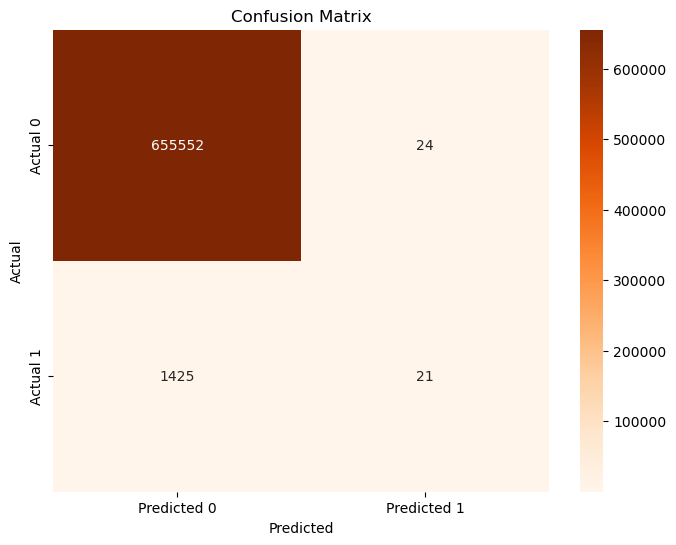

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot some features => Decision Boundary

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Logistic Regression

In [78]:
model = LogisticRegression()

In [79]:
param_grid = {'C': np.logspace(-3, 3, 7)}

In [80]:
grid_search = GridSearchCV(model, param_grid, cv=None, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_val_pca, t_val)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
             scoring='accuracy')

In [81]:
best_C = grid_search.best_params_['C']

In [82]:
best_C

0.001

In [83]:
best_model = LogisticRegression(C=best_C)
best_model.fit(X_train_pca, t_train)

# Save the model to a file
joblib.dump(best_model, 'logistic_regression_model.joblib')

['logistic_regression_model.joblib']

In [84]:
from sklearn.metrics import precision_score, recall_score, f1_score

t_train_pred = best_model.predict(X_train_pca)
t_test_pred = best_model.predict(X_test_pca)
t_val_pred = best_model.predict(X_val_pca)
train_accuracy = accuracy_score(t_train, t_train_pred)
test_accuracy = accuracy_score(t_test, t_test_pred)
validation_accuracy = accuracy_score(t_val, t_val_pred)
train_precision = precision_score(t_train, t_train_pred)
train_recall = recall_score(t_train, t_train_pred)
train_f1 = f1_score(t_train, t_train_pred)
print(f'Train Accuracy: {train_accuracy}')
print(f'Train Precision: {train_precision}')
print(f'Train Recall: {train_recall}')
print(f'Train F1 Score: {train_f1}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Validation Accuracy: {validation_accuracy}')

Train Accuracy: 0.9976089080730934
Train Precision: 0.2384937238493724
Train Recall: 0.03941908713692946
Train F1 Score: 0.06765578635014836
Test Accuracy: 0.9976063640883586
Validation Accuracy: 0.9975424565490691


In [85]:
# Assuming 'y_true' is the true labels and 'y_pred' is the predicted labels
cm = confusion_matrix(t_train, t_train_pred)

In [86]:
cm

array([[655394,    182],
       [  1389,     57]], dtype=int64)

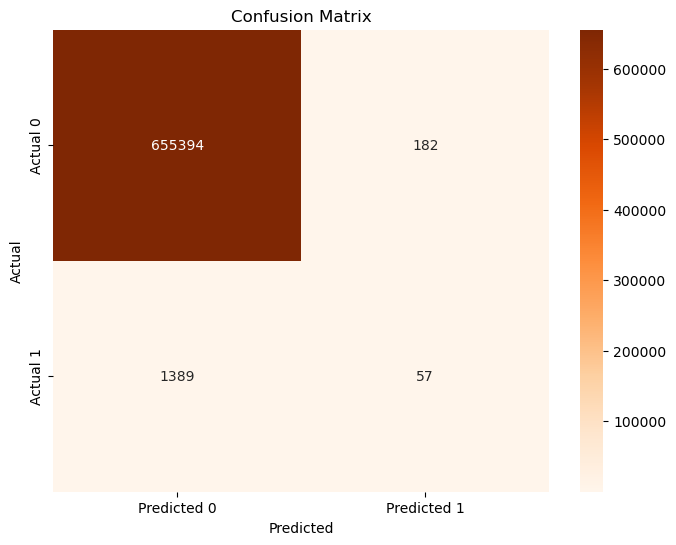

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## ANN

In [88]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [96]:
# Create a Sequential model
model = Sequential()

# Add input layer
model.add(Dense(units=64, activation='relu', input_dim=X_train_pca.shape[1]))

# Add first hidden layer
model.add(Dense(units=32, activation='relu'))

# Add second hidden layer
model.add(Dense(units=16, activation='relu'))

# Add output layer with sigmoid activation for binary classification
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mse', 'accuracy'])

# Train the model
history = model.fit(X_train_pca, t_train, epochs=100, batch_size=32, validation_data=(X_val_pca, t_val))

# Save the model to a file
model.save('ANN_model.h5')

Epoch 1/100
20532/20532 [==============================] - 36s 2ms/step - loss: 0.0062 - mse: 0.0018 - accuracy: 0.9978 - val_loss: 0.0062 - val_mse: 0.0016 - val_accuracy: 0.9979
Epoch 2/100
20532/20532 [==============================] - 35s 2ms/step - loss: 0.0048 - mse: 0.0015 - accuracy: 0.9980 - val_loss: 0.0042 - val_mse: 0.0013 - val_accuracy: 0.9980
Epoch 3/100
20532/20532 [==============================] - 38s 2ms/step - loss: 0.0045 - mse: 0.0014 - accuracy: 0.9980 - val_loss: 0.0041 - val_mse: 0.0013 - val_accuracy: 0.9981
Epoch 4/100
20532/20532 [==============================] - 37s 2ms/step - loss: 0.0042 - mse: 0.0013 - accuracy: 0.9981 - val_loss: 0.0047 - val_mse: 0.0014 - val_accuracy: 0.9982
Epoch 5/100
20532/20532 [==============================] - 38s 2ms/step - loss: 0.0042 - mse: 0.0013 - accuracy: 0.9981 - val_loss: 0.0041 - val_mse: 0.0013 - val_accuracy: 0.9982
Epoch 6/100
20532/20532 [==============================] - 35s 2ms/step - loss: 0.0042 - mse: 0.0013

20532/20532 [==============================] - 36s 2ms/step - loss: 0.0039 - mse: 0.0012 - accuracy: 0.9982 - val_loss: 0.0051 - val_mse: 0.0014 - val_accuracy: 0.9981
Epoch 47/100
20532/20532 [==============================] - 35s 2ms/step - loss: 0.0038 - mse: 0.0012 - accuracy: 0.9983 - val_loss: 0.0038 - val_mse: 0.0012 - val_accuracy: 0.9983
Epoch 48/100
20532/20532 [==============================] - 35s 2ms/step - loss: 0.0039 - mse: 0.0012 - accuracy: 0.9983 - val_loss: 0.0046 - val_mse: 0.0013 - val_accuracy: 0.9982
Epoch 49/100
20532/20532 [==============================] - 36s 2ms/step - loss: 0.0038 - mse: 0.0012 - accuracy: 0.9983 - val_loss: 0.0047 - val_mse: 0.0013 - val_accuracy: 0.9981
Epoch 50/100
20532/20532 [==============================] - 36s 2ms/step - loss: 0.0039 - mse: 0.0012 - accuracy: 0.9983 - val_loss: 0.0040 - val_mse: 0.0013 - val_accuracy: 0.9982
Epoch 51/100
20532/20532 [==============================] - 35s 2ms/step - loss: 0.0039 - mse: 0.0012 - accu

20532/20532 [==============================] - 35s 2ms/step - loss: 0.0039 - mse: 0.0012 - accuracy: 0.9983 - val_loss: 0.0086 - val_mse: 0.0013 - val_accuracy: 0.9983
Epoch 92/100
20532/20532 [==============================] - 38s 2ms/step - loss: 0.0039 - mse: 0.0012 - accuracy: 0.9983 - val_loss: 0.0097 - val_mse: 0.0012 - val_accuracy: 0.9983
Epoch 93/100
20532/20532 [==============================] - 35s 2ms/step - loss: 0.0041 - mse: 0.0013 - accuracy: 0.9982 - val_loss: 0.0069 - val_mse: 0.0014 - val_accuracy: 0.9981
Epoch 94/100
20532/20532 [==============================] - 34s 2ms/step - loss: 0.0042 - mse: 0.0013 - accuracy: 0.9982 - val_loss: 0.0053 - val_mse: 0.0012 - val_accuracy: 0.9983
Epoch 95/100
20532/20532 [==============================] - 34s 2ms/step - loss: 0.0040 - mse: 0.0012 - accuracy: 0.9982 - val_loss: 0.0148 - val_mse: 0.0013 - val_accuracy: 0.9982
Epoch 96/100
20532/20532 [==============================] - 34s 2ms/step - loss: 0.0042 - mse: 0.0013 - accu

C:\Users\majet\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [95]:
# Evaluate the model on the test set
t_train_pred = (model.predict(X_train_pca) > 0.5).astype(int)
train_accuracy = accuracy_score(t_train, t_train_pred)
t_test_pred = (model.predict(X_test_pca) > 0.5).astype(int)
test_accuracy = accuracy_score(t_test, t_test_pred)
t_val_pred = (model.predict(X_val_pca) > 0.5).astype(int)
validation_accuracy = accuracy_score(t_val, t_val_pred)
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Validation Accuracy: {validation_accuracy}')

4400/4400 [==============================] - 5s 1ms/step
Train Accuracy: 0.9981796652166899
Test Accuracy: 0.9981390723772995
Validation Accuracy: 0.9982101128623279


In [97]:
# Assuming 'y_true' is the true labels and 'y_pred' is the predicted labels
cm = confusion_matrix(t_train, t_train_pred)

In [98]:
cm

array([[655398,    178],
       [  1018,    428]], dtype=int64)

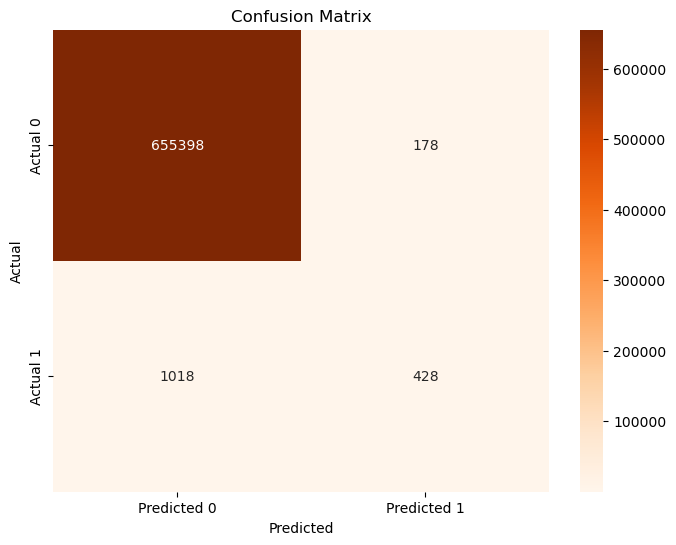

In [99]:
# Plot some features => Decision Boundary

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

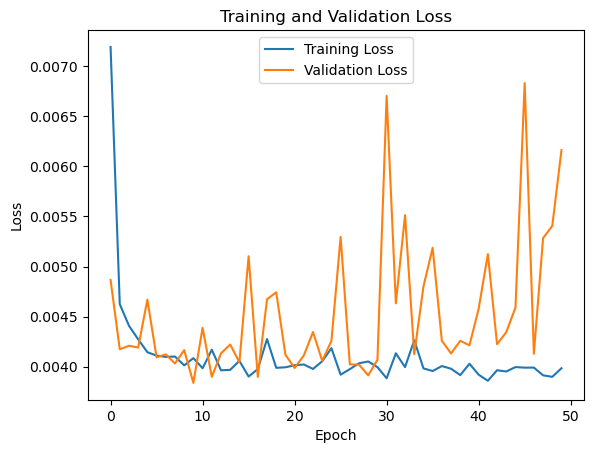

In [94]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()